# Holocene Ice , Based on Sigl et al., 2013

#### Importing packages 

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scipy
import warnings 
from tabulate import tabulate
from scipy import interpolate
from scipy import signal
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import seaborn as sns
from matplotlib import style
import matplotlib.font_manager
from itertools import zip_longest

np.set_printoptions(threshold=np.inf)
sns.set_theme(context='paper', style='white', palette='colorblind',font='arial')
#plt.style.use('seaborn-bright')
#plt.style.available

#### Data from Sigl et al. 2013

In [2]:
sigletal = pd.read_excel('Sigl_et_al_JGR_2013_data.xls')
results = pd.read_excel('sigletal2013_results.xlsx')

sigletal

,Year*,nssS_ng/g,Depth_m,Depth_mweq,Unnamed: 4,"From Sigl et al., JGR, 2013",Unnamed: 6
0,2006.956,14.941,0.016,0.006,NaN,Ice Core: WDC06A (WAIS Divide),NaN
1,2006.876,14.863,0.045,0.017,NaN,Lat:,79 28 5S
2,2006.789,14.784,0.076,0.029,NaN,Lon:,112 4 1W
3,2006.708,14.705,0.105,0.040,NaN,S measurement method ICP-MS at the Desert Rese...,NaN
4,2006.628,14.627,0.134,0.051,NaN,* Age scale may change with subsequent interpr...,NaN
...,...,...,...,...,...,...,...
27526,-407.624,9.714,576.758,507.952,NaN,NaN,NaN
27527,-407.710,9.915,576.782,507.974,NaN,NaN,NaN
27528,-407.791,10.389,576.805,507.995,NaN,NaN,NaN
27529,-407.876,10.723,576.829,508.017,NaN,NaN,NaN


#### Arrays with data 

In [3]:
## Pandas to array ## 

WAIS = np.array(sigletal)
results=np.array(results)

## Flip the arrays ##

years = np.flip(WAIS[:,0]) #years array
nssS = np.flip(WAIS[:,1]) #nssS concentration array
depth= np.flip(WAIS[:,2]) #depth array
depth_mweq = np.flip(WAIS[:,3])
thickness = depth[:-1] - depth[1:]###bottom to the top###

print(len(nssS))

sulfate_dep_sigl = results[:,3]
year_sigl = results[:,1]

## Annual array ## 

WAIS_annual = np.arange(-408,2007,1) 

## The two time arrays in a table ## 

headers=('Array', 'First year', 'Last year')
first_column = np.array(['WAIS_annual', 'years', 'thickness', 'depth'])
second_column = np.array([WAIS_annual[0], years[0], thickness[0], depth[0]])
third_column = np.array([ WAIS_annual[-1], years[-1], thickness[-1], depth[-1]])
table = zip(first_column, second_column, third_column)
print(tabulate(table, headers=headers, floatfmt=".3f"))


27531
Array          First year    Last year
-----------  ------------  -----------
WAIS_annual      -408.000     2006.000
years            -407.958     2006.956
thickness           0.023        0.029
depth             576.852        0.016


#### Sulfate deposition Sigl et al 2013

In [4]:
sulfate_dep_sigl2= []
year_sigl2= []

for i in range(1,len(sulfate_dep_sigl)):
    if pd.isnull(sulfate_dep_sigl[i]):
        continue
    else:
        if len(sulfate_dep_sigl[i][:]) == 9: 
            sulfate_dep_sigl2.append(sulfate_dep_sigl[i][:3])
            year_sigl2.append(year_sigl[i])
        else:
            sulfate_dep_sigl2.append(sulfate_dep_sigl[i][:4])
            year_sigl2.append(year_sigl[i])
            

In [5]:
thickness = depth[:-1] - depth[1:]

#### 1. Annualy averaging and annual thickness

In [6]:
### creating empty arrays ###

nssS_annual = []
thickness_annual = []
WAIS_annual = np.arange(-408,2007,1) 
### 1. Annualy averaging ### 

for i in range(len(WAIS_annual)-1):
    index = np.where((years > WAIS_annual[i]) & (years < WAIS_annual[i]+1))
    #print(years[index])
    if nssS[index].size == 0: 
        
        nssS_annual.append(np.nan)
        thickness_annual.append(np.nan)
     

    else:
    #with warnings.catch_warnings(): ## ignoring warning of empty element nanmean ##
        #warnings.simplefilter("ignore", category=RuntimeWarning)
        nssS_annual.append(np.nanmean(nssS[index]))
        thickness_annual.append(np.nansum(thickness[index]))


WAIS_annual = WAIS_annual[:-1]
#nssS_annual = nssS_annual[:-1]

## -407,2005

print(WAIS_annual[0], WAIS_annual[-1], len(thickness_annual), len(nssS_annual), len(WAIS_annual))
#thickness_annual_interp = np.copy(thickness_annual)


-408 2005 2414 2414 2414


#### Plotting the raw and annual nssS concentration 

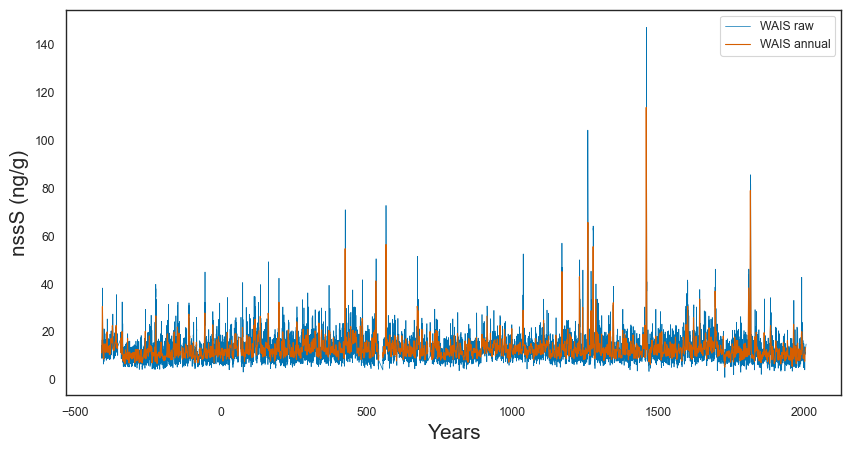

In [7]:
plt.figure(figsize=(10,5))
plt.plot(years, nssS, 'b',linewidth=0.5, markersize=1 ,label='WAIS raw')
plt.plot(WAIS_annual, nssS_annual, 'r', linewidth=0.8, label='WAIS annual')
plt.xlabel('Years', fontsize=15)
plt.ylabel('nssS (ng/g)', fontsize=15)
plt.legend()
plt.show()

#### 2. Interpolation of the missing data (nssS values) 

#### Interpolation of the missing data (thickness values) 

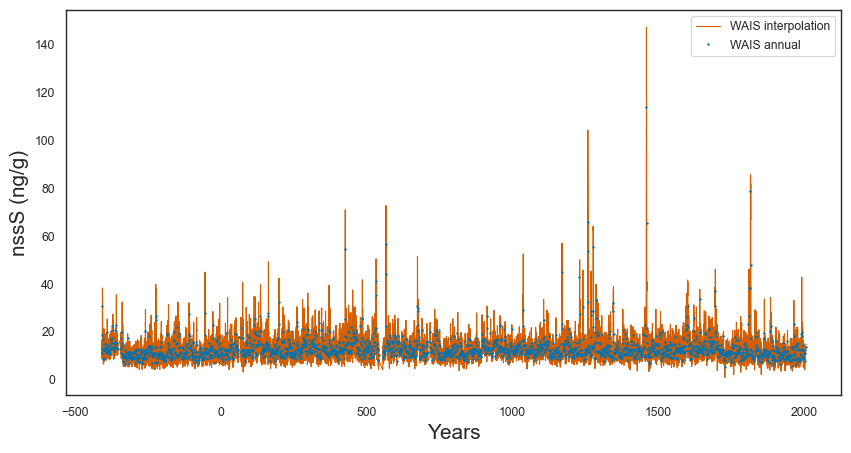

In [8]:
plt.figure(figsize=(10,5))
plt.plot(years, nssS, linewidth=0.8, linestyle='-',color='r', label='WAIS interpolation')
plt.plot(WAIS_annual, nssS_annual, 'b.', markersize=1.5, label='WAIS annual')
plt.xlabel('Years', fontsize=15)
plt.ylabel('nssS (ng/g)', fontsize=15)
plt.legend()
plt.show()

#### 3. 31-year running median filter (RM) 

In [9]:
RM = np.zeros(len(WAIS_annual))
MAD = np.zeros(len(WAIS_annual))
y = np.zeros(len(WAIS_annual))

#RM = scipy.signal.medfilt(nssS_annual_interp, kernel_size=31) ## just to compare

nssS_annual = np.array(nssS_annual)

for i in range(len(WAIS_annual)):
    idx = np.where((WAIS_annual> WAIS_annual[i]-16) & (WAIS_annual<WAIS_annual[i]+16) & (~np.isnan(WAIS_annual)))
    RM[i] = np.nanmedian(nssS_annual[idx])
    MAD[i] = scipy.stats.median_abs_deviation(nssS_annual, nan_policy='omit')
    y[i] = 3*MAD[i] + RM[i]

#### MAD (median absolute deviation) 

#### Plotting the RM and MAD 

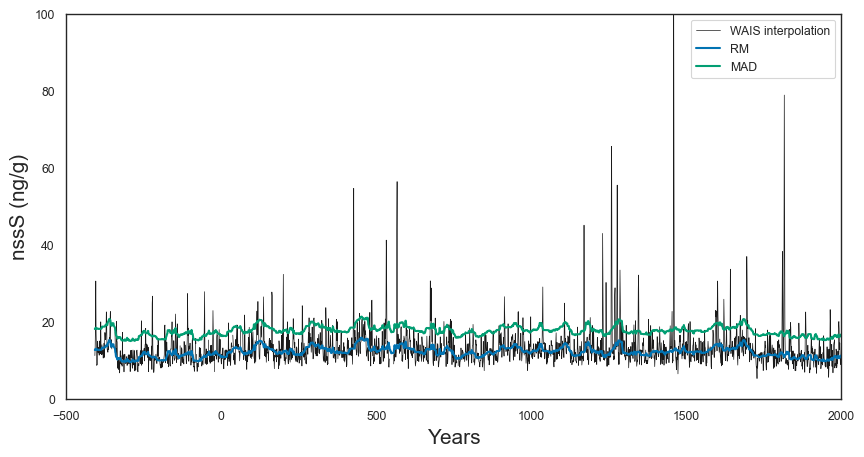

In [10]:
plt.figure(figsize=(10,5))
plt.plot(WAIS_annual, nssS_annual, linewidth=.5, linestyle='-',color='k', label='WAIS interpolation')
plt.plot(WAIS_annual, RM, linewidth=1.5, label='RM')
plt.plot(WAIS_annual, y, linewidth=1.5, color= 'g', label='MAD')
plt.xlabel('Years', fontsize=15)
plt.ylabel('nssS (ng/g)', fontsize=15)
plt.xlim(-500,2000)
plt.ylim(0,100)
plt.legend()
plt.show()

#### 4. Exclude volcanic signals 

In [11]:
eruptions = []
eruption_year = []

diff = nssS_annual - y

for i in range(len(diff)):
    if diff[i] > 0:
        eruptions.append(diff[i])
        eruption_year.append(WAIS_annual[i])
    else:
        continue

#### Running median filter without the influence of volcanism 

In [12]:
nssS_annual_mod = np.copy(nssS_annual)

### Taking away influence of volcanism ###

for i in range(len(nssS_annual)):
    if nssS_annual[i] > y[i]:
        nssS_annual_mod[i] = np.nan
    else:
        continue
        
### interpolating the data without volcanism ###
        
nssS_annual_mod = np.reshape(nssS_annual_mod,(len(nssS_annual_mod),))

RM_new = np.zeros(len(WAIS_annual))
MAD_new = np.zeros(len(WAIS_annual))
y_new = np.zeros(len(WAIS_annual))
#RM_new = scipy.signal.medfilt(nssS_annual_interp, kernel_size=31) ## just to compare

for i in range(len(WAIS_annual)):
    idx = np.where((WAIS_annual[:]> WAIS_annual[i]-16) & (WAIS_annual[:]<WAIS_annual[i]+16) & (~np.isnan(WAIS_annual[:])))
    RM_new[i] = np.nanmedian(nssS_annual_mod[idx])
    MAD_new[i] = scipy.stats.median_abs_deviation(nssS_annual_mod, nan_policy='omit')
    y_new[i] = 3*MAD_new[i] + RM_new[i]
    
print(nssS_annual_mod)

[11.26091667 13.2755             nan         nan 17.2345     12.66175
  8.71266667  8.86433333  8.92391667 14.99841667 12.60541667 11.92358333
 13.34075    12.73975    11.3565     15.05058333 13.7235     13.3005
 11.77408333         nan 12.806      11.50683333 12.88558333 14.06983333
 11.60916667 11.72283333 12.54325    10.60925    12.73683333 14.472
 10.76225    13.32933333 17.2465     17.17141667 15.65633333 15.38283333
 17.37008333         nan         nan 13.55375    12.67916667 12.917
 12.131      13.6935     12.87625    14.78308333 15.25083333 15.93008333
 15.49366667 20.26191667         nan 13.59508333 13.388      15.3775
 13.26075    12.97466667         nan         nan         nan         nan
         nan         nan         nan         nan         nan 17.3892
 13.54608333 11.31275    13.06991667 10.71933333         nan 15.19491667
 14.7357      9.08366667  7.96025     9.80341667  7.65825    10.57066667
  9.68375     9.45283333  6.75588889 10.9125     12.5135      9.08816667
 11

#### Plotting the data compared to Sigl et al (2013)

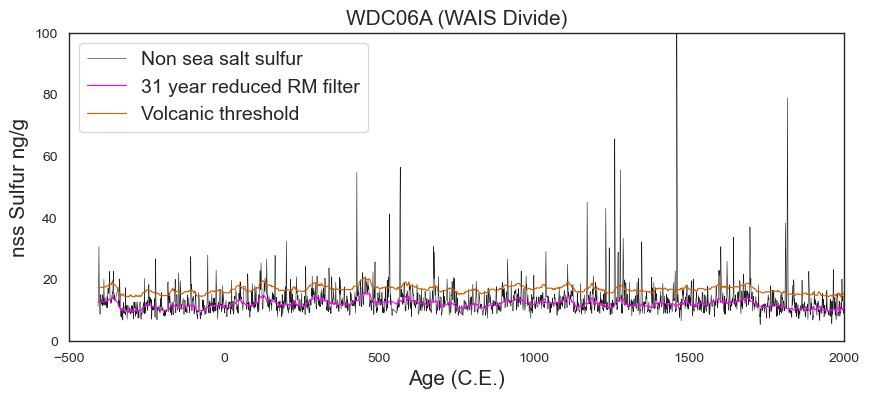

In [13]:
WAIS_annual = np.arange(-407.5,2006.5,1)
plt.figure(figsize=(10,4))
#plt.plot(years, nssS, 'b',linewidth=0.5, markersize=1 ,label='WAIS raw')
plt.plot(WAIS_annual[~np.isnan(nssS_annual)], nssS_annual[~np.isnan(nssS_annual)], color='k', label = 'Non sea salt sulfur', linewidth=0.4)
plt.plot(WAIS_annual[~np.isnan(nssS_annual)], RM_new[~np.isnan(nssS_annual)], 'magenta', linewidth=0.8, label = '31 year reduced RM filter')
plt.plot(WAIS_annual[~np.isnan(nssS_annual)], y_new[~np.isnan(nssS_annual)],'r', linewidth=0.8, label = 'Volcanic threshold')
plt.title('WDC06A (WAIS Divide)', fontsize=15)
plt.xlabel('Age (C.E.)', fontsize=15)
plt.ylabel('nss Sulfur ng/g', fontsize=15)
plt.ylim(0,100)
plt.xlim(-500,2000)
plt.tick_params(axis='both', labelsize=10)
plt.legend(fontsize=14)
plt.savefig('WDC06A.png')

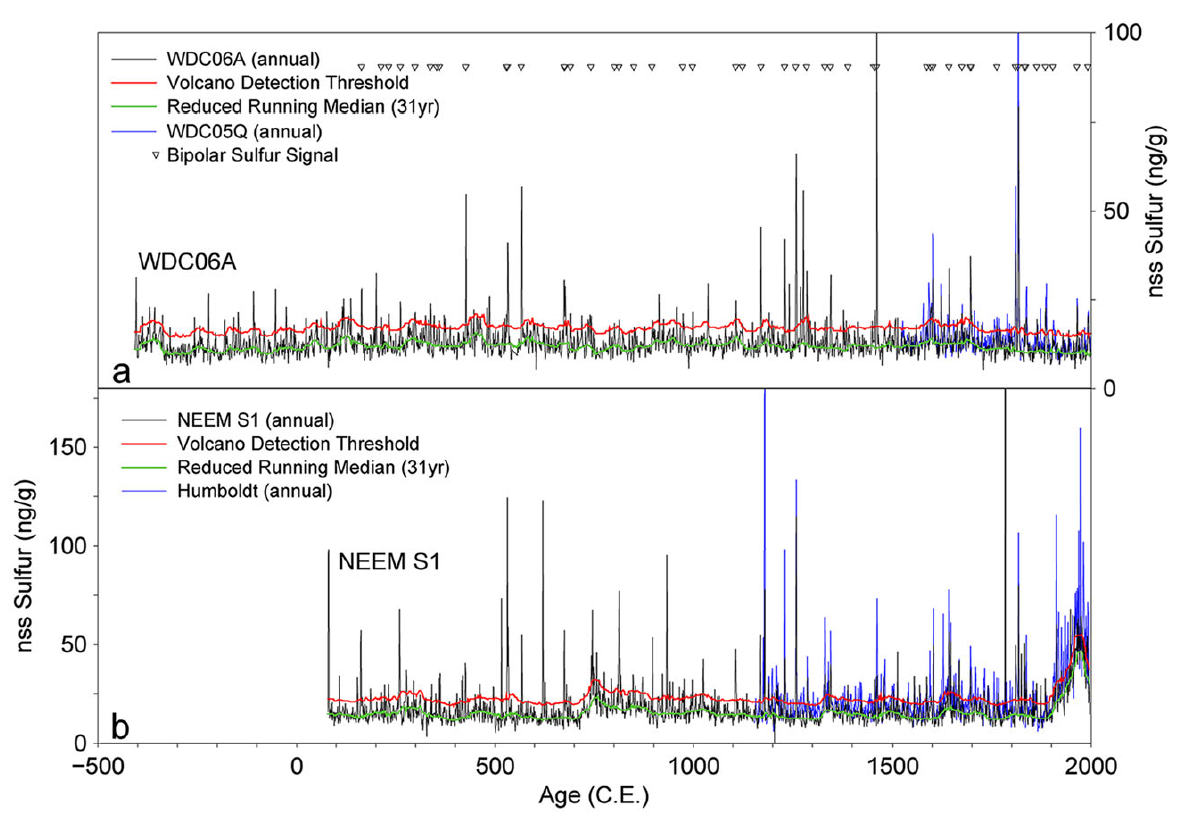

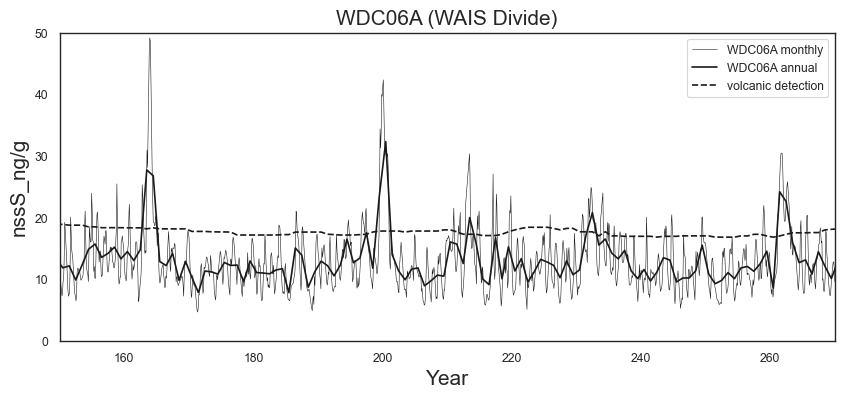

In [14]:
#print(WAIS_annual[-1])
WAIS_annual = np.arange(-407.5,2006.5,1)
plt.figure(figsize=(10,4))
plt.plot(years, nssS, color='k', linewidth = 0.4, label = 'WDC06A monthly')
plt.plot(WAIS_annual, nssS_annual, 'k',linewidth=1.2, label = 'WDC06A annual')
plt.plot(WAIS_annual, y,'k--', label = 'volcanic detection')
plt.title('WDC06A (WAIS Divide)', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('nssS_ng/g', fontsize=15)
plt.ylim(0,50)
plt.xlim(150,270)
plt.legend()
plt.show()

#### Integrating the volcanic peaks --> sulfate deposition 


In [15]:
print('Length of the arrays:')
print('Length WAIS annual =', len(WAIS_annual), 'Length nssS interp =', len(nssS_annual), 'Length y new =', len(y_new))
print('First and last values of the arrays:')
print('WAIS annual:', WAIS_annual[0], WAIS_annual[-1])
print('nssS annual:', nssS_annual[0],  nssS_annual[-1])
print('y new:', y_new[0], y_new[-1])

Length of the arrays:
Length WAIS annual = 2414 Length nssS interp = 2414 Length y new = 2414
First and last values of the arrays:
WAIS annual: -407.5 2005.5
nssS annual: 11.260916666666667 13.503666666666666
y new: 17.365208333333335 15.33595833333334


#### Calculating the sulfate deposition

In [16]:
sulfate = []
sulfate_dep = []
year = []
first_year = []
last_year = []

for i in range(len(WAIS_annual)):
    
    if nssS_annual[i] > y_new[i]: 
        sulfate.append((nssS_annual[i] - RM_new[i]) * 3 * 1e-3 * 917 * thickness_annual[i])
        year.append(WAIS_annual[i])
        continue
        
    else: 
        if len(sulfate) != 0:
            sulfate_dep.append(np.sum(sulfate))
            first_year.append(year[0])
            last_year.append(year[-1])
            sulfate = []
            year = []
    
        else:
            sulfate=[]
            year = []
        

In [17]:
sulfate_dep = np.array(sulfate_dep)
sulfate_dep_2 = []
first_year_2 = []

for i in range(len(sulfate_dep)):
    if sulfate_dep[i] < 2: 
        continue 
    else: 
        sulfate_dep_2.append(sulfate_dep[i])
        first_year_2.append(first_year[i])       

print(len(sulfate_dep_sigl2), len(sulfate_dep_2))

105 147


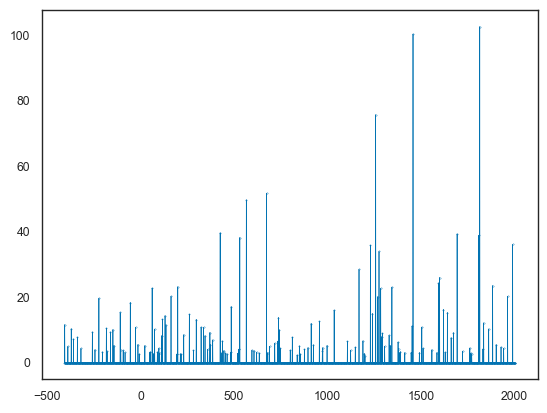

In [18]:
sul = [0] * len(WAIS_annual)
first_year_2 = np.array(first_year_2)

for i in range(len(WAIS_annual)):
    for j in range(len(sulfate_dep_2)):
        if WAIS_annual[i] == first_year_2[j]:
            sul[i] = sulfate_dep_2[j]
        else:
            continue
        
#sul = np.where(WAIS_annual.any() != first_year_2.any(), np.nan , sulfate_dep_2)



plt.figure()
plt.plot(WAIS_annual, sul, 'b.-', linewidth=.5, markersize=.5)
#plt.xlim(1450, 1463)
plt.show()

In [19]:
# header = ('year', 'SO4-2', 'year sigl', 'SO4-2 sigl')

# table = zip(np.flip(first_year_2), np.flip(sulfate_dep_2), year_sigl2, sulfate_dep_sigl2)

# print(tabulate(table, headers=header, floatfmt=".4f"))

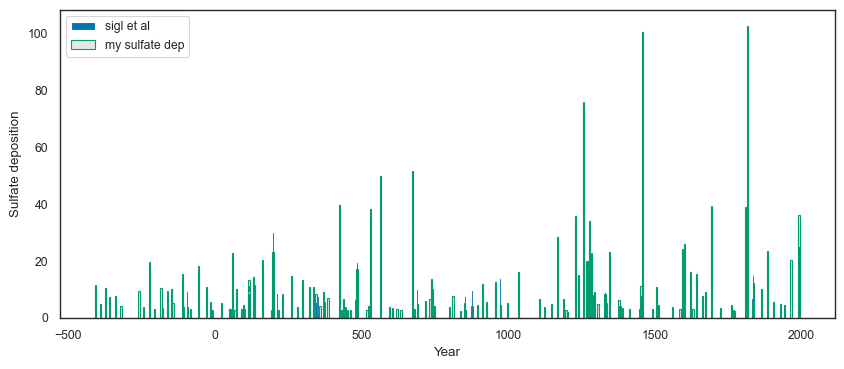

In [20]:
year_sigl2 = [float(x) for x in year_sigl2]
sulfate_dep_sigl2 = [float(x) for x in sulfate_dep_sigl2]

plt.figure(figsize=(10,4))

plt.bar(year_sigl2, sulfate_dep_sigl2, label ='sigl et al', width=4.0)
plt.bar(first_year_2, sulfate_dep_2, label='my sulfate dep',color=(0.1, 0.1, 0.1, 0.1),edgecolor='g', linestyle='-',width=4.0)
plt.legend(loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('Sulfate deposition')
plt.show()

#### Making sure the correct years are mathing between the data sets 

In [21]:
y_sigl = []
y_mydata = []
s_sigl = []
s_mydata = []

first_year_2_flip = np.array(np.flip(first_year_2))
sulfate_dep_2_flip = np.flip(sulfate_dep_2)
year_sigl2 = np.array(year_sigl2)

for i in range(len(first_year_2)):
    for j in range(len(year_sigl2)):
        if np.abs(first_year_2_flip[i]-year_sigl2[j]) < 1:
            y_mydata.append(first_year_2_flip[i])
            s_mydata.append(sulfate_dep_2_flip[i])
            y_sigl.append(year_sigl2[j])
            s_sigl.append(sulfate_dep_sigl2[j])
        else:
            continue
        

header = ('year', 'SO4-2', 'year sigl', 'SO4-2 sigl')

table = zip_longest(y_mydata, s_mydata, y_sigl, s_sigl)

print(tabulate(table, headers=header, floatfmt=".4f"))

print(len(year_sigl2), len(y_sigl))
    

     year     SO4-2    year sigl    SO4-2 sigl
---------  --------  -----------  ------------
1991.5000   36.0750    1991.5000       25.4000
1964.5000   20.2426    1963.6000       16.5000
1903.5000    5.5030    1902.9000        5.4000
1884.5000   23.5197    1884.0000       11.2000
1863.5000   10.3016    1862.6000        7.1000
1832.5000    4.1805    1831.7000        6.9000
1815.5000  102.5641    1815.4000       88.6000
1809.5000   38.8333    1809.4000       33.8000
1762.5000    4.4868    1762.1000        7.1000
1694.5000   39.3059    1694.6000       38.7000
1674.5000    9.1330    1673.7000       11.5000
1662.5000    7.6111    1662.5000        5.7000
1642.5000   15.2796    1641.6000       12.4000
1621.5000   16.2173    1620.8000       17.8000
1600.5000   25.9857    1600.4000       24.0000
1594.5000   24.3097    1594.7000       32.8000
1586.5000    3.0784    1585.8000        8.9000
1505.5000   10.8642    1504.9000        8.0000
1458.5000  100.3196    1458.4000      103.0000
1453.5000   1

In [22]:
len(y_sigl), len(year_sigl2)

(88, 105)

#### Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from scipy.stats.stats import pearsonr

corr = pearsonr(s_sigl, s_mydata)
print("corr=", corr)

s_sigl = np.array(s_sigl).reshape((-1,1))
s_mydata = np.array(s_mydata).reshape((-1,1))

model = LinearRegression().fit(s_sigl , s_mydata)
r_sq = model.score(s_sigl,s_mydata)

print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

xx = np.arange(-5,120,1)
yy = xx * model.coef_ + model.intercept_
yy = yy.reshape((125,))

corr= (0.964372468188988, 1.9240869551139836e-51)
coefficient of determination: 0.9300142574009201
intercept: [-1.92416921]
slope: [[1.03045971]]


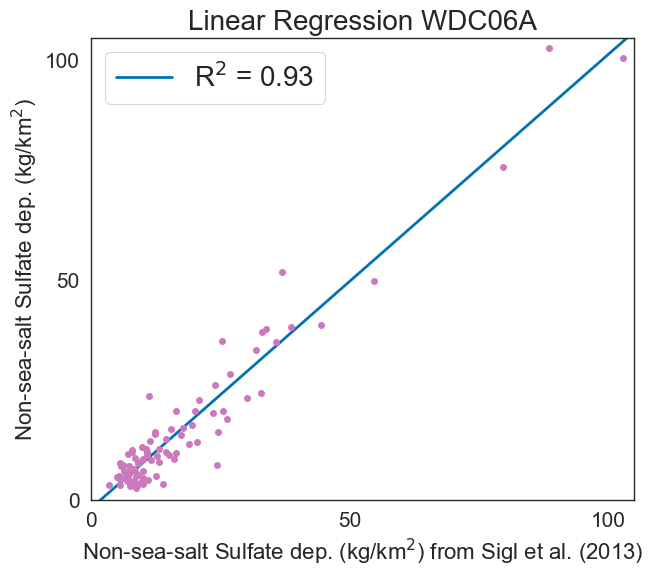

In [24]:
xticks = [0,50,100]
yticks= [0,50,100]

plt.figure(figsize=(7,6))
plt.plot(xx,yy, 'b', label = f'R$^2$ = {np.round(r_sq,2)}', linewidth=2)
plt.plot(s_sigl, s_mydata, 'm.', markersize=8)
plt.xlabel('Non-sea-salt Sulfate dep. (kg/km$^2$) from Sigl et al. (2013)', fontsize=16)
plt.ylabel('Non-sea-salt Sulfate dep. (kg/km$^2$) ', fontsize=16)
plt.title('Linear Regression WDC06A', fontsize=20)
plt.xticks(xticks, xticks, fontsize=15)
plt.yticks(yticks, yticks, fontsize=15)
plt.legend(fontsize=20)
plt.xlim(0,105)
plt.ylim(0,105)
plt.savefig('LR_WDC06A.jpg', dpi=1000, bbox_inches='tight')
plt.show()